In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
placement_data = pd.read_csv("Placement_Data_Full_Class.csv")

In [3]:
placement_data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
placement_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [5]:
placement_data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [6]:
placement_data.drop('sl_no', axis = 1, inplace = True)

In [7]:
placement_data.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

In [8]:
corr_data = placement_data.corr()

In [9]:
import seaborn as sns

In [10]:
import matplotlib.pyplot as plt

In [11]:
sns.set(rc = {'figure.figsize': (7,7)})

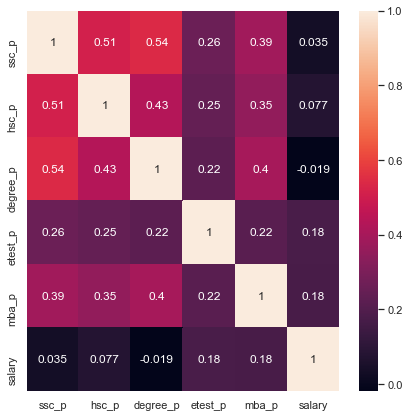

In [12]:
sns.heatmap(corr_data, annot = True)
plt.show()

In [13]:
new_placement_data = placement_data[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']]

In [14]:
new_placement_data

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,67.00,91.00,58.00,55.0,58.80,270000.0
1,79.33,78.33,77.48,86.5,66.28,200000.0
2,65.00,68.00,64.00,75.0,57.80,250000.0
3,56.00,52.00,52.00,66.0,59.43,NaN
4,85.80,73.60,73.30,96.8,55.50,425000.0
...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,400000.0
211,58.00,60.00,72.00,74.0,53.62,275000.0
212,67.00,67.00,73.00,59.0,69.72,295000.0
213,74.00,66.00,58.00,70.0,60.23,204000.0


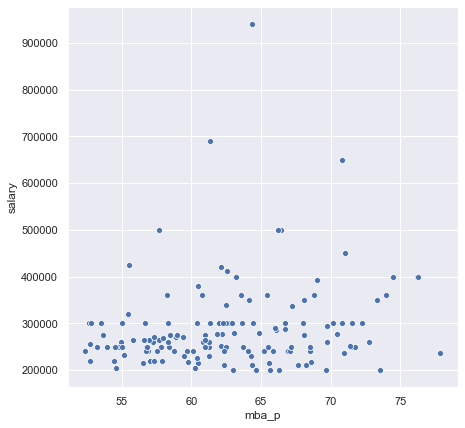

In [15]:
plt.figure(figsize = (7, 7))
sns.scatterplot(x = 'mba_p', y = 'salary', data = new_placement_data)
plt.show()

In [16]:
new_placement_data.isnull().any()

ssc_p       False
hsc_p       False
degree_p    False
etest_p     False
mba_p       False
salary       True
dtype: bool

In [17]:
new_placement_data.fillna(0, inplace = True)

C:\Users\Kartik\Anaconda3\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [18]:
new_placement_data.isnull().any()

ssc_p       False
hsc_p       False
degree_p    False
etest_p     False
mba_p       False
salary      False
dtype: bool

In [19]:
new_placement_data.head(15)

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,67.00,91.00,58.00,55.00,58.80,270000.0
1,79.33,78.33,77.48,86.50,66.28,200000.0
2,65.00,68.00,64.00,75.00,57.80,250000.0
3,56.00,52.00,52.00,66.00,59.43,0.0
4,85.80,73.60,73.30,96.80,55.50,425000.0
5,55.00,49.80,67.25,55.00,51.58,0.0
6,46.00,49.20,79.00,74.28,53.29,0.0
7,82.00,64.00,66.00,67.00,62.14,252000.0
8,73.00,79.00,72.00,91.34,61.29,231000.0
9,58.00,70.00,61.00,54.00,52.21,0.0


In [20]:
X = new_placement_data.iloc[:, 0:-1]
X

,ssc_p,hsc_p,degree_p,etest_p,mba_p
0,67.00,91.00,58.00,55.0,58.80
1,79.33,78.33,77.48,86.5,66.28
2,65.00,68.00,64.00,75.0,57.80
3,56.00,52.00,52.00,66.0,59.43
4,85.80,73.60,73.30,96.8,55.50
...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49
211,58.00,60.00,72.00,74.0,53.62
212,67.00,67.00,73.00,59.0,69.72
213,74.00,66.00,58.00,70.0,60.23


In [21]:
Y = placement_data.status
Y

0          Placed
1          Placed
2          Placed
3      Not Placed
4          Placed
          ...    
210        Placed
211        Placed
212        Placed
213        Placed
214    Not Placed
Name: status, Length: 215, dtype: object

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 3)

In [23]:
x_train.shape

(150, 5)

In [24]:
x_test.shape

(65, 5)

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 15)

In [27]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=15, splitter='best')

In [28]:
y_pred = clf.predict(x_test)
y_pred

array(['Not Placed', 'Not Placed', 'Placed', 'Placed', 'Placed',
       'Not Placed', 'Placed', 'Placed', 'Not Placed', 'Not Placed',
       'Placed', 'Not Placed', 'Placed', 'Not Placed', 'Placed', 'Placed',
       'Placed', 'Placed', 'Not Placed', 'Placed', 'Placed', 'Placed',
       'Placed', 'Placed', 'Not Placed', 'Not Placed', 'Placed', 'Placed',
       'Not Placed', 'Not Placed', 'Placed', 'Not Placed', 'Placed',
       'Placed', 'Placed', 'Placed', 'Placed', 'Not Placed', 'Placed',
       'Placed', 'Placed', 'Placed', 'Placed', 'Placed', 'Placed',
       'Placed', 'Placed', 'Placed', 'Placed', 'Placed', 'Placed',
       'Placed', 'Not Placed', 'Placed', 'Not Placed', 'Placed', 'Placed',
       'Placed', 'Placed', 'Not Placed', 'Placed', 'Placed', 'Placed',
       'Not Placed', 'Not Placed'], dtype=object)

In [29]:
from sklearn import metrics

In [30]:
metrics.accuracy_score(y_test, y_pred)

0.8307692307692308

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
random_clf = RandomForestClassifier(n_estimators = 25, criterion = 'entropy', random_state = 3)

In [33]:
random_clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=3, verbose=0,
                       warm_start=False)

In [34]:
y_pred = random_clf.predict(x_test)
y_pred

array(['Placed', 'Not Placed', 'Placed', 'Placed', 'Placed', 'Not Placed',
       'Placed', 'Placed', 'Not Placed', 'Not Placed', 'Placed',
       'Not Placed', 'Placed', 'Not Placed', 'Placed', 'Placed', 'Placed',
       'Placed', 'Not Placed', 'Placed', 'Placed', 'Placed', 'Placed',
       'Placed', 'Not Placed', 'Not Placed', 'Placed', 'Placed',
       'Not Placed', 'Not Placed', 'Placed', 'Not Placed', 'Placed',
       'Placed', 'Not Placed', 'Placed', 'Placed', 'Not Placed', 'Placed',
       'Placed', 'Placed', 'Placed', 'Placed', 'Placed', 'Placed',
       'Placed', 'Placed', 'Placed', 'Placed', 'Placed', 'Placed',
       'Placed', 'Not Placed', 'Placed', 'Not Placed', 'Placed', 'Placed',
       'Placed', 'Placed', 'Not Placed', 'Placed', 'Placed', 'Placed',
       'Not Placed', 'Not Placed'], dtype=object)

In [35]:
metrics.accuracy_score(y_test, y_pred)

0.8615384615384616

In [36]:
X.columns

Index(['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p'], dtype='object')

In [37]:
Y = placement_data.status
Y

0          Placed
1          Placed
2          Placed
3      Not Placed
4          Placed
          ...    
210        Placed
211        Placed
212        Placed
213        Placed
214    Not Placed
Name: status, Length: 215, dtype: object

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 3)

In [40]:
log_reg = LogisticRegression()

In [41]:
log_reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
log_reg.intercept_

array([-13.43447384])

In [43]:
log_reg.coef_

array([[ 0.16732619,  0.08154563,  0.11939371, -0.00799804, -0.14565753]])

In [44]:
y_pred = log_reg.predict(x_test)

In [45]:
metrics.accuracy_score(y_test, y_pred)

0.8769230769230769

In [46]:
X.columns

Index(['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p'], dtype='object')

In [47]:
workex = placement_data.workex
workex

0       No
1      Yes
2       No
3       No
4       No
      ... 
210     No
211     No
212    Yes
213     No
214     No
Name: workex, Length: 215, dtype: object

In [48]:
X = pd.concat((X, workex), axis = 1)

In [49]:
X

,ssc_p,hsc_p,degree_p,etest_p,mba_p,workex
0,67.00,91.00,58.00,55.0,58.80,No
1,79.33,78.33,77.48,86.5,66.28,Yes
2,65.00,68.00,64.00,75.0,57.80,No
3,56.00,52.00,52.00,66.0,59.43,No
4,85.80,73.60,73.30,96.8,55.50,No
...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,No
211,58.00,60.00,72.00,74.0,53.62,No
212,67.00,67.00,73.00,59.0,69.72,Yes
213,74.00,66.00,58.00,70.0,60.23,No


In [50]:
Y = new_placement_data.salary
Y

0      270000.0
1      200000.0
2      250000.0
3           0.0
4      425000.0
         ...   
210    400000.0
211    275000.0
212    295000.0
213    204000.0
214         0.0
Name: salary, Length: 215, dtype: float64

In [51]:
X.dtypes

ssc_p       float64
hsc_p       float64
degree_p    float64
etest_p     float64
mba_p       float64
workex       object
dtype: object

In [52]:
new_workex = pd.get_dummies(workex, drop_first = True)

In [53]:
new_workex

,Yes
0,0
1,1
2,0
3,0
4,0
...,...
210,0
211,0
212,1
213,0


In [54]:
X = pd.concat((X, new_workex), axis = 1)

In [55]:
X

,ssc_p,hsc_p,degree_p,etest_p,mba_p,workex,Yes
0,67.00,91.00,58.00,55.0,58.80,No,0
1,79.33,78.33,77.48,86.5,66.28,Yes,1
2,65.00,68.00,64.00,75.0,57.80,No,0
3,56.00,52.00,52.00,66.0,59.43,No,0
4,85.80,73.60,73.30,96.8,55.50,No,0
...,...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,No,0
211,58.00,60.00,72.00,74.0,53.62,No,0
212,67.00,67.00,73.00,59.0,69.72,Yes,1
213,74.00,66.00,58.00,70.0,60.23,No,0


In [56]:
X.drop('workex', axis = 1, inplace = True)
X.columns

Index(['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'Yes'], dtype='object')

In [57]:
X.drop('etest_p', axis = 1, inplace = True)
X.dtypes

ssc_p       float64
hsc_p       float64
degree_p    float64
mba_p       float64
Yes           uint8
dtype: object

In [58]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
lin_model = LinearRegression()

In [61]:
lin_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
lin_model.coef_

array([ 5587.76417315,  3379.55354265,  1861.70563631, -2817.06448217,
       56199.6615774 ])

In [63]:
lin_model.intercept_

-363138.3299317743

In [64]:
y_pred = lin_model.predict(x_test)

In [65]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
108,300000.0,219033.334078
207,300000.0,334297.976637
106,0.0,62619.121424
107,200000.0,346629.138190
51,0.0,75533.120567
...,...,...
114,250000.0,203366.953965
127,250000.0,205895.026241
116,300000.0,244578.922976
117,240000.0,267606.365021


In [66]:
metrics.r2_score(y_test, y_pred)

0.5202770466469232

In [67]:
x_test.columns

Index(['ssc_p', 'hsc_p', 'degree_p', 'mba_p', 'Yes'], dtype='object')

In [101]:
ran_clf = RandomForestClassifier(n_estimators = 15, criterion = 'entropy', random_state = 1)

In [102]:
ran_clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [103]:
y_pred = ran_clf.predict(x_test)

In [104]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
108,300000.0,278000.0
207,300000.0,218000.0
106,0.0,0.0
107,200000.0,400000.0
51,0.0,0.0
...,...,...
114,250000.0,265000.0
127,250000.0,216000.0
116,300000.0,0.0
117,240000.0,240000.0


In [105]:
metrics.accuracy_score(y_test, y_pred)

0.4